In [109]:
# Import Dependencies
%matplotlib inline
import math, time, random, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [110]:
test=pd.read_csv('test.csv')

In [111]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [112]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [113]:
test.shape

(1459, 80)

In [114]:
train=pd.read_csv('train.csv')

In [115]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [117]:
train.shape

(1460, 81)

<AxesSubplot:>

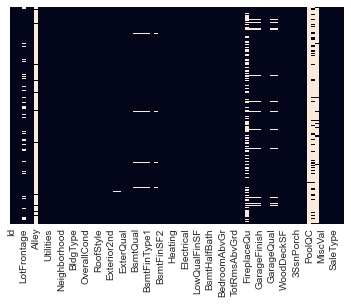

In [118]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False )

In [119]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [120]:
# fill with mean with the data is numerical

In [121]:
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [122]:
# fill with mode if data is categorical

In [123]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [124]:
train['BsmtCond']=train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual']=train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['FireplaceQu']=train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType']=train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual']=train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond']=train['GarageCond'].fillna(train['GarageCond'].mode()[0])
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])
train['BsmtExposure']=train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType2']=train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])

In [125]:
# Drop the columns which do not require 

train.drop(['Alley'],axis=1,inplace=True)
train.drop(['GarageYrBlt'],axis=1,inplace=True)
train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
train.drop(['Id'],axis=1,inplace=True)
train.dropna(inplace=True)

<AxesSubplot:>

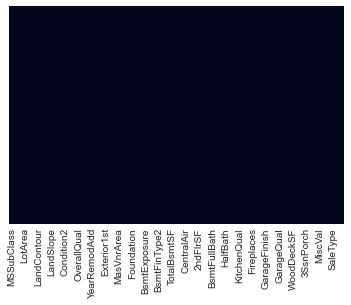

In [126]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False )

In [127]:
train.shape

(1422, 75)

In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1422 non-null   int64  
 1   MSZoning       1422 non-null   object 
 2   LotFrontage    1422 non-null   float64
 3   LotArea        1422 non-null   int64  
 4   Street         1422 non-null   object 
 5   LotShape       1422 non-null   object 
 6   LandContour    1422 non-null   object 
 7   Utilities      1422 non-null   object 
 8   LotConfig      1422 non-null   object 
 9   LandSlope      1422 non-null   object 
 10  Neighborhood   1422 non-null   object 
 11  Condition1     1422 non-null   object 
 12  Condition2     1422 non-null   object 
 13  BldgType       1422 non-null   object 
 14  HouseStyle     1422 non-null   object 
 15  OverallQual    1422 non-null   int64  
 16  OverallCond    1422 non-null   int64  
 17  YearBuilt      1422 non-null   int64  
 18  YearRemo

In [129]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [130]:
#now the dataset train is clean

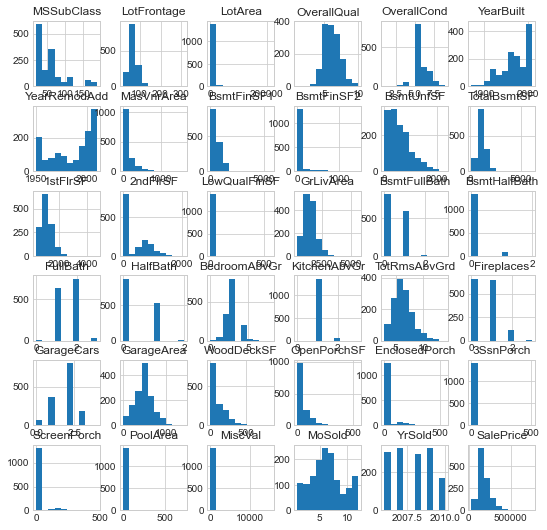

In [131]:
fig = train.hist(figsize=(9,9))

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

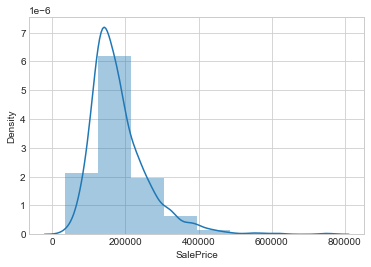

In [132]:
sns.distplot(train['SalePrice'], kde=True, bins=8)

### Operation on the test dataset

<AxesSubplot:>

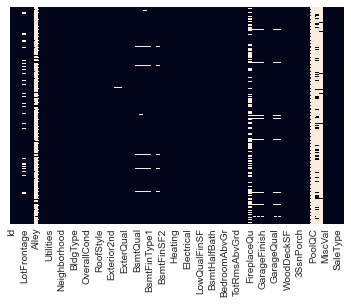

In [133]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False )

In [134]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [135]:
#fill With Mean if it Mumeric 
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())

In [136]:
# fill With Mode if it Categorical 
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])
test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])
test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['BsmtFinType1']=test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['BsmtFullBath']=test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].mean())

In [137]:
# Drop Feature
test.drop(['Alley'],axis=1,inplace=True)
test.drop(['GarageYrBlt'],axis=1,inplace=True)
test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)

<AxesSubplot:>

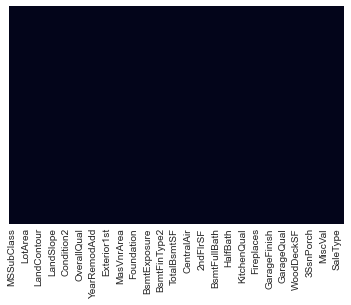

In [138]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False )

In [161]:
train['SalePrice'].describe()

count      1422.000000
mean     182889.092124
std       79414.407095
min       34900.000000
25%      131625.000000
50%      165000.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

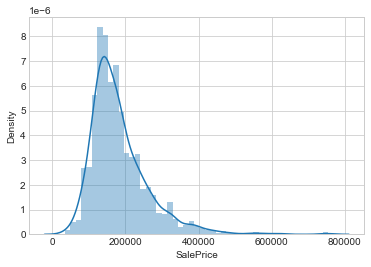

In [163]:
sns.distplot(train['SalePrice'])

### Relationship between the variable

In [165]:
c=pd.concat([train['SalePrice'],train['GrLivArea']],axis=1)

# Plotting scatter plot between these two. And it is evident that saleprice and GrLivArea has liner relationship between
them.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

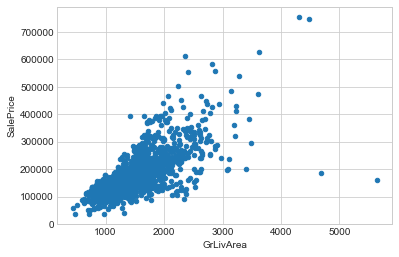

In [166]:
c.plot.scatter(x='GrLivArea',y='SalePrice')

#Now finding out the relation between SalePrice and TotalBsmtSF and while plotting the scatter plot it shows it has exponential relationship between these two variable.

In [168]:
c1=pd.concat([train['SalePrice'],train['TotalBsmtSF']],axis=1)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

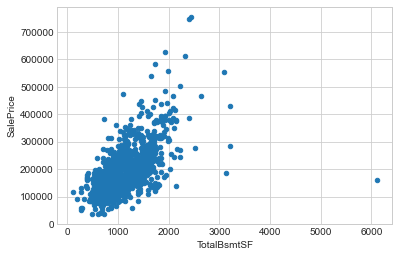

In [169]:
c1.plot.scatter(x='TotalBsmtSF',y='SalePrice')

#Now finding out the relationship between SalePrice and OverallQual and since it is categorical variable we will plot
boxplot

In [172]:
c2=pd.concat([train['SalePrice'],train['OverallQual']],axis=1)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

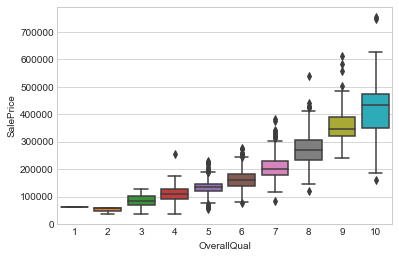

In [173]:
sns.boxplot(x='OverallQual',y='SalePrice',data=c2)

##It is clearly shown that when OverallQual goes up , salePrice also increases.

In [139]:
ConCat_DF =pd.concat([train,test],axis=0)

In [140]:
ConCat_DF.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [141]:
ConCat_DF.shape

(2881, 75)

In [142]:
ConCat_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2881 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2881 non-null   int64  
 1   MSZoning       2881 non-null   object 
 2   LotFrontage    2881 non-null   float64
 3   LotArea        2881 non-null   int64  
 4   Street         2881 non-null   object 
 5   LotShape       2881 non-null   object 
 6   LandContour    2881 non-null   object 
 7   Utilities      2881 non-null   object 
 8   LotConfig      2881 non-null   object 
 9   LandSlope      2881 non-null   object 
 10  Neighborhood   2881 non-null   object 
 11  Condition1     2881 non-null   object 
 12  Condition2     2881 non-null   object 
 13  BldgType       2881 non-null   object 
 14  HouseStyle     2881 non-null   object 
 15  OverallQual    2881 non-null   int64  
 16  OverallCond    2881 non-null   int64  
 17  YearBuilt      2881 non-null   int64  
 18  YearRemo

In [145]:
column_name_cat=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [146]:
def Hot_Encoded_Cat(Nams_list ,train_Dataset):


    for name in Nams_list:
        frames=pd.get_dummies(train_Dataset[name],drop_first=True)
        train_Dataset.drop([name],axis=1,inplace=True)
        train_Dataset = pd.concat([train_Dataset, frames], axis=1)
        

        

    return train_Dataset

In [147]:
Final_Result = Hot_Encoded_Cat(column_name_cat, ConCat_DF)

In [148]:
Final_Result

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,1,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,1,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,0,0,0,1,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,1,0,1


In [149]:
Final_Result.shape

(2881, 235)

In [150]:
DataFrame_Train=Final_Result.iloc[:1422,:]
DataFrame_Test=Final_Result.iloc[1422:,:]

In [151]:
DataFrame_Test.drop(['SalePrice'],axis=1,inplace=True)

In [152]:
X_train=DataFrame_Train.drop(['SalePrice'],axis=1)
y_train=DataFrame_Train['SalePrice']

In [153]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)
Acc= regressor.score(X_train, y_train)

print("Accurcy For Linear regression is  :" , Acc)

Accurcy For Linear regression is  : 0.9297405753928644


In [159]:
y_pred = regressor.predict(DataFrame_Test)

y_pred =np.array(y_pred)
y_pred

array([113088.54568942, 160947.41316441, 189113.04316216, ...,
       181851.81909083, 107744.02869072, 221427.1541045 ])